In [1]:
import numpy as np
from math import sqrt

from mltools.kmeans import KMeans, KMeansMahalanobis

In [2]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [3]:
X_iris, Y_iris = datasets.load_iris(return_X_y=True)

In [4]:
print(X_iris)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
print(Y_iris)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X_iris)
X = pca.transform(X_iris)
Y = Y_iris

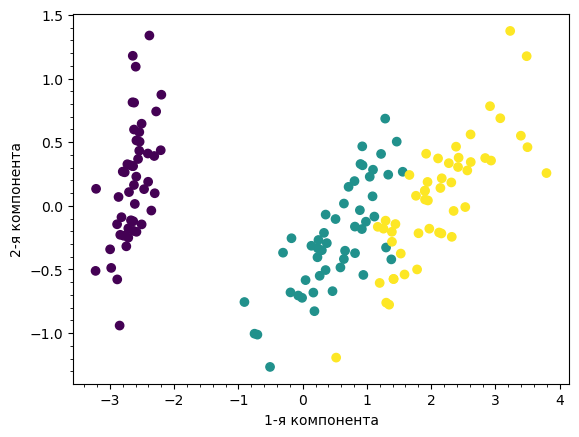

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.minorticks_on()
plt.xlabel("1-я компонента")
plt.ylabel("2-я компонента")
plt.show()

In [9]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [10]:
km = KMeans(3)

0.49069507162115467
0.06294080780087742
0.07387777815412223
0.09332387816434728
0.08384767632273245
0.08900563150994945
0.02537327242894078
0.0


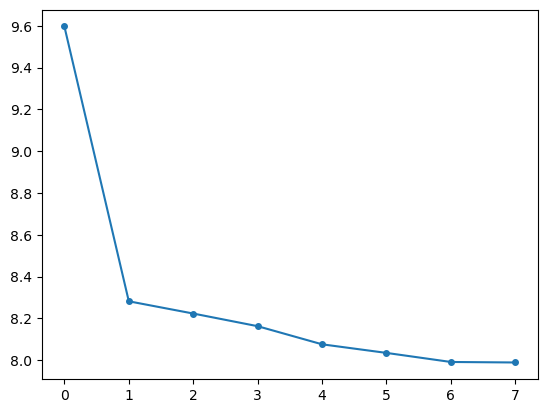

In [11]:
km.fit(X)

plt.plot(km.qvals, marker='o', markersize=4)
plt.show()

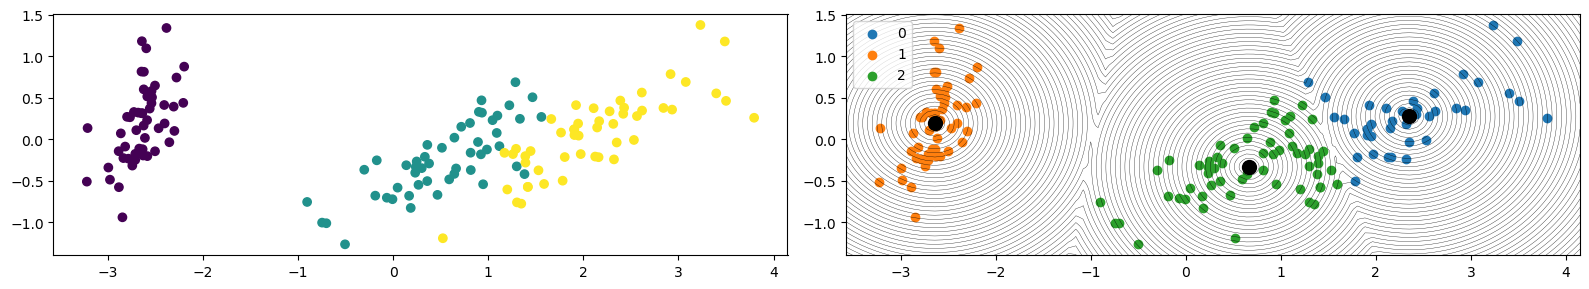

In [12]:
plt.figure(figsize=(16,3), )
plt.subplot(1,2,1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1], c=Y)

plt.subplot(1,2,2)
Is = km.find_clusters(X)
for j, Ij in enumerate(Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(km.c[:,0], km.c[:,1], c='k', s=100)

Z = km.eval_dists(XY)
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 50), 
            extent=(xmin,xmax,ymin,ymax), linewidths=0.25, alpha=0.95, colors='k')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()

In [13]:
kmm = KMeansMahalanobis(3)

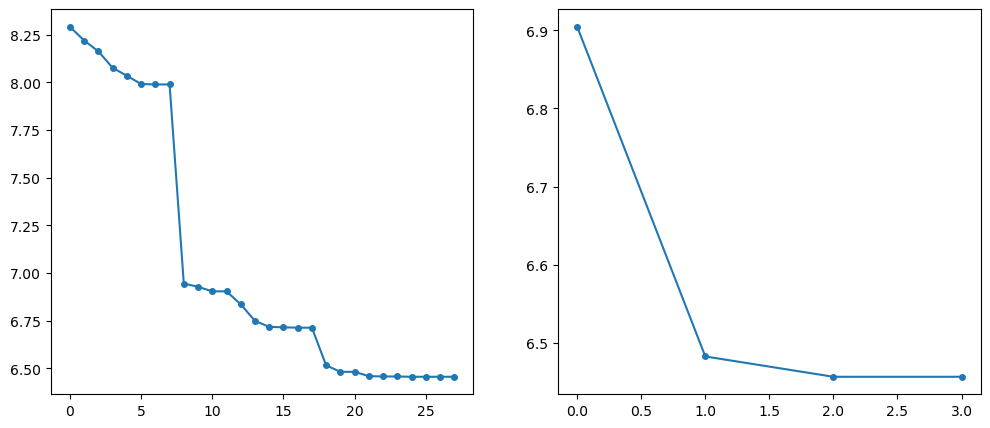

In [14]:
kmm.fit(X)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(kmm.qvals, marker='o', markersize=4)
plt.subplot(1,2,2)
plt.plot(kmm.qvals2, marker='o', markersize=4)
plt.show()

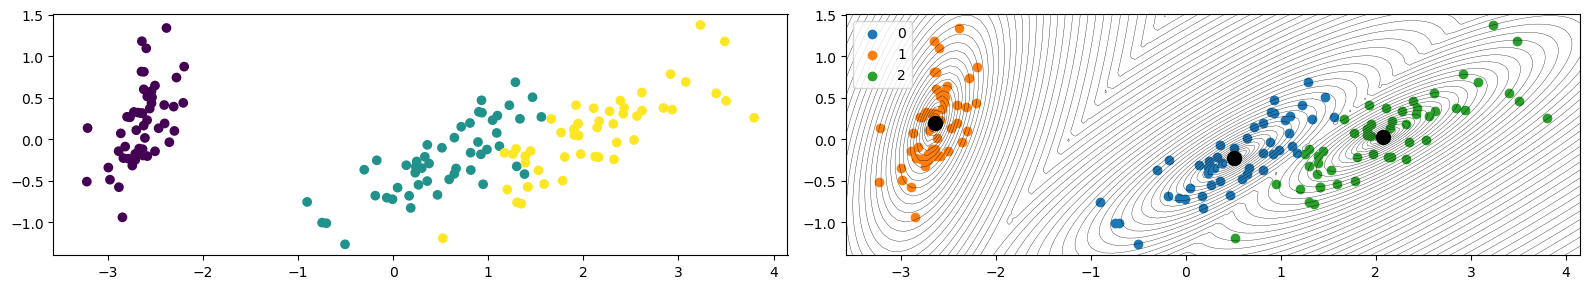

In [15]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.subplot(1,2,2)
for j, Ij in enumerate(kmm.Is):
    Xj = X[Ij]
    plt.scatter(Xj[:,0], Xj[:,1], label=str(j))
plt.scatter(kmm.c[:,0], kmm.c[:,1], c='k', s=100)

Z = np.sqrt(kmm.eval_dists(XY))
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 50), extent=(xmin,xmax,ymin,ymax), linewidths=0.25, alpha=0.95, colors='k')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.legend()
plt.tight_layout()
plt.show()

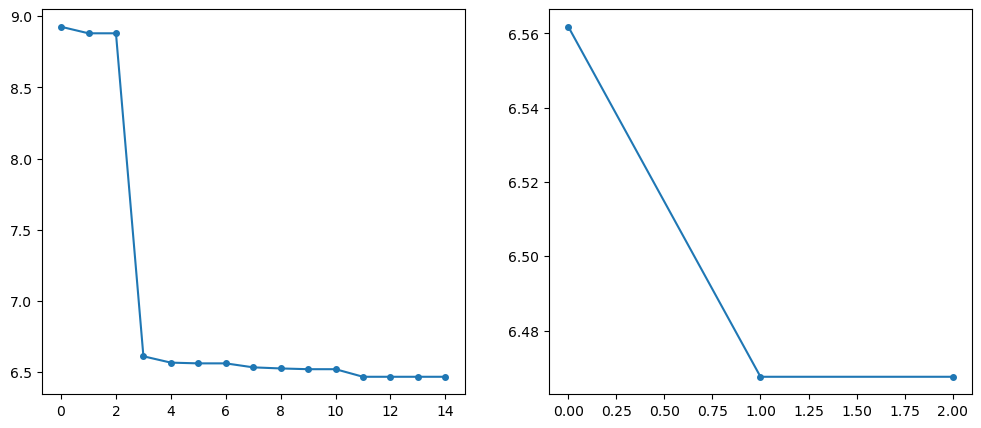

In [16]:
kmm3 = KMeansMahalanobis(3)
kmm3.fit(X_iris)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(kmm3.qvals, marker='o', markersize=4)
plt.subplot(1,2,2)
plt.plot(kmm3.qvals2, marker='o', markersize=4)
plt.show()

In [17]:
Y3 = kmm3.predict(X_iris)

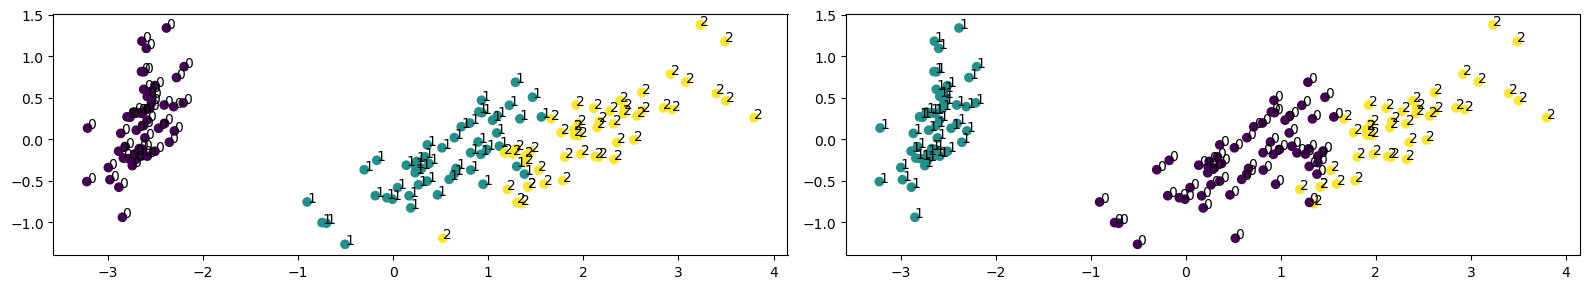

In [18]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
for x,y,z in zip(X[:,0], X[:,1], Y):
    plt.text(x, y, str(z))
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y3)
for x,y,z in zip(X[:,0], X[:,1], Y3):
    plt.text(x, y, str(z))
plt.tight_layout()
plt.show()

In [19]:
Y3_  = Y3.copy()
Y3[Y3_ == 0] = 1
Y3[Y3_ == 1] = 0
# Y3[Y3_ == 2] = 1

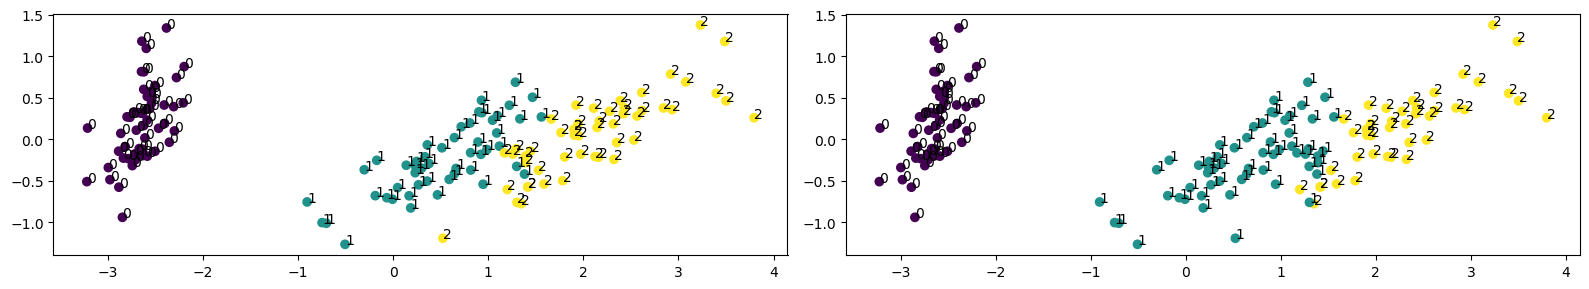

In [20]:
plt.figure(figsize=(16,3))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
for x,y,z in zip(X[:,0], X[:,1], Y):
    plt.text(x, y, str(z))
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y3)
for x,y,z in zip(X[:,0], X[:,1], Y3):
    plt.text(x, y, str(z))
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(Y, Y3))

0.9466666666666667


### Задача 11

Используем набор данных `wine` с предварительным масштабированием значений признаков (`sklearn.preprocessing.scale`).

Методом `kmeans` найти центры кластеров и сравнить результат кластеризации с заданной классификацией.

### Задача 12

Используем набор данных `wine` с предварительным масштабированием значений признаков (`sklearn.preprocessing.scale`).

Методом `kmeans` на основе расстояния Махаланобиса найти центры кластеров и сравнить результат кластеризации с заданной классификацией.